In [14]:
import pandas as pd
import numpy as np

import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [24]:

# Предварительная обработка данных
#Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше.
#features = pandas.read_csv('./features.csv', index_col='match_id')

#Загружаем тренировочные данные и тестовые
train = pd.read_csv('features.csv', index_col='match_id')
#test = pd.read_csv('features_test.csv', index_col='match_id')

# Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
train.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'
        ], axis=1, inplace=True)

# Разделяем  на признаки 
X = train
# и y - целевую переменную
y = train['radiant_win'].to_frame()
del train['radiant_win']


In [16]:
#Замените пропуски на нули с помощью функции fillna(). 
#На самом деле этот способ является предпочтительным для логистической регрессии, 
#поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. 

# Заменяем пропуски на 0
X = X.fillna(0)

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [18]:
#Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), 
#не забудьте перемешать при этом выборку (shuffle=True), 
#поскольку данные в таблице отсортированы по времени, 
#и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества.

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

In [19]:
#Оптимальный параметр регуляции

def model_C(X, y, C):
    print 'C =', str(C)
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def model_All(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = model_C(X, y, C)
        print model_scores
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        scores.append(np.mean(model_scores))

    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

C = 1e-05
[ 0.6931532   0.69481539  0.69571379  0.69513159  0.69699445]
Time elapsed: 0:00:12.008000
C = 0.0001
[ 0.70956686  0.71039474  0.71170336  0.71176082  0.71336295]
Time elapsed: 0:00:12.892000
C = 0.001
[ 0.71449541  0.71577214  0.71625974  0.71697301  0.71831738]
Time elapsed: 0:00:14.288000
C = 0.01
[ 0.71464598  0.71617915  0.71624749  0.71735041  0.71832832]
Time elapsed: 0:00:15.095000
C = 0.1
[ 0.71462192  0.71617479  0.71619187  0.71737596  0.7182712 ]
Time elapsed: 0:00:16.211000
C = 1.0
[ 0.71461815  0.71617185  0.71618338  0.7173762   0.71826341]
Time elapsed: 0:00:15.647000
C = 10.0
[ 0.71461695  0.71617179  0.71618281  0.71737669  0.7182632 ]
Time elapsed: 0:00:16.191000
C = 100.0
[ 0.71461692  0.71617206  0.71618249  0.71737655  0.71826345]
Time elapsed: 0:00:16.646000
C = 1000.0
[ 0.71461693  0.71617214  0.7161825   0.71737659  0.71826346]
Time elapsed: 0:00:16.090000
C = 10000.0
[ 0.71461693  0.71617215  0.71618251  0.7173766   0.71826345]
Time elapsed: 0:00:16

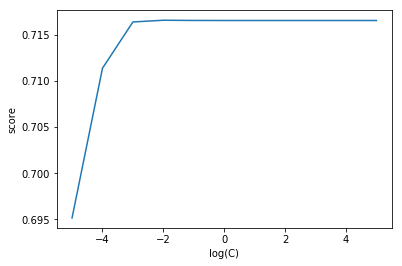

In [20]:
C, score = model_All(X, y)
    

In [21]:
print C
print score

0.01
0.716550269726


Самое лучшее значение показателя AUC-ROC  => C = 0.01, score =  0.71. Это близко по значению с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает немного быстрее.

In [25]:
# Удаляем все категориальные признаки и повторяем
del train['lobby_type']
train_2 = train
for k in xrange(1, 6):
    del train_2['r{}_hero'.format(k)]
    del train_2['d{}_hero'.format(k)]
    
# Разделяем  на признаки 
X_2 = train_2

# Заменяем пропуски на 0
X_2 = X_2.fillna(0)

scaler = StandardScaler()
X_2 = scaler.fit_transform(X_2)


#print X_2

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[ 0.69301063  0.69476367  0.69562225  0.69507488  0.69702952]
Time elapsed: 0:00:12.297000
C = 0.0001
[ 0.70936502  0.71042199  0.71168956  0.71168269  0.71353648]
Time elapsed: 0:00:12.926000
C = 0.001
[ 0.71434804  0.71581532  0.71629769  0.7168852   0.71853275]
Time elapsed: 0:00:14.587000
C = 0.01
[ 0.71450425  0.71622052  0.71627999  0.71725088  0.71854131]
Time elapsed: 0:00:15.111000
C = 0.1
[ 0.71448206  0.71620992  0.71622569  0.71726917  0.71848436]
Time elapsed: 0:00:16.280000
C = 1.0
[ 0.71447768  0.71620627  0.7162209   0.71727019  0.71847678]
Time elapsed: 0:00:16.031000
C = 10.0
[ 0.71447669  0.71620645  0.71621968  0.71727123  0.71847581]
Time elapsed: 0:00:15.844000
C = 100.0
[ 0.7144767   0.71620624  0.71621963  0.71727119  0.71847569]
Time elapsed: 0:00:15.965000
C = 1000.0
[ 0.71447667  0.71620624  0.71621965  0.71727119  0.71847569]
Time elapsed: 0:00:15.974000
C = 10000.0
[ 0.71447668  0.71620627  0.71621961  0.71727117  0.71847569]
Time elapsed: 0:00:15

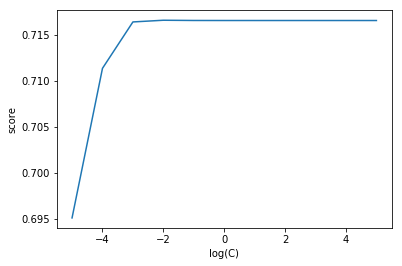

In [27]:
C, score = model_All(X_2, y)
    

In [28]:
print C
print score

0.01
0.716559388563


Удаление категориальных признаков не влияет на качество работы модели. Лучшее значение показателя AUC-ROC  достигается при C = 0.01, score = 0.71. 

In [29]:
#print train



In [30]:
#Загружаем тренировочные данные и тестовые
train = pd.read_csv('features.csv', index_col='match_id')
#test = pd.read_csv('features_test.csv', index_col='match_id')

# Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# Удаляем все категориальные признаки и повторяем
del train['lobby_type']



In [31]:
#Воспользуемся подходом "мешок слов" для кодирования информации о героях. 
#Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, 
#если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; 
#минус единице, если i-й герой играл за команду Dire.

# "мешок слов" по героям
def hero_sack(X):
    X_n = np.zeros((X.shape[0], 112))
    for i, match_id in enumerate(X.index):
        for p in xrange(5):
            X_n[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_n[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pd.DataFrame(X_n, index=X.index)

In [32]:
X = train

# и y - целевую переменную
y = train['radiant_win'].to_frame()
del train['radiant_win']

# Заменяем пропуски на 0
X = X.fillna(0)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index = X.index)



In [33]:
X_3 = hero_sack(train)

X = pd.concat([X, X_3], axis=1)

C:\Users\swb1mk\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [34]:
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[ 0.69734258  0.698844    0.6995673   0.69941962  0.70103117]
Time elapsed: 0:00:13.284000
C = 0.0001
[ 0.7237361   0.72409993  0.72458163  0.72605192  0.72684832]
Time elapsed: 0:00:14.311000
C = 0.001
[ 0.74477849  0.74668328  0.74397291  0.74889226  0.74736143]
Time elapsed: 0:00:16.264000
C = 0.01
[ 0.74952425  0.7527421   0.74909058  0.75545962  0.75171025]
Time elapsed: 0:00:19.174000
C = 0.1
[ 0.74946346  0.75310936  0.74936491  0.75604945  0.75156738]
Time elapsed: 0:00:22.280000
C = 1.0
[ 0.74939012  0.75312637  0.74936566  0.75609113  0.75149727]
Time elapsed: 0:00:23.439000
C = 10.0
[ 0.74938114  0.75312506  0.7493625   0.75609488  0.7514882 ]
Time elapsed: 0:00:23.445000
C = 100.0
[ 0.74938116  0.75312485  0.74936229  0.75609552  0.75148688]
Time elapsed: 0:00:23.285000
C = 1000.0
[ 0.74938025  0.75312468  0.74936218  0.75609563  0.75148707]
Time elapsed: 0:00:23.321000
C = 10000.0
[ 0.74938023  0.75312472  0.74936219  0.7560956   0.75148664]
Time elapsed: 0:00:24

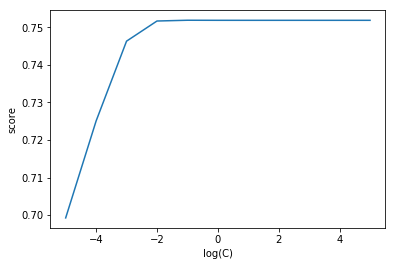

In [35]:
C, score = model_All(X, y)

In [36]:
print C
print score

0.1
0.751910912605


После добавления "мешка слов" по героям качество предсказания  улучшилось. Самое лучшее значение показателя AUC-ROC достигается уже при C = 0.1 и равно 0.75. Это потому что в этом случае мы имеем упорядоченную разреженную матрицу для построения предсказания.